# Cloning and installing neccesary repositories

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd & pip install -r requirements.txt

In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Loading and making detections using default Yolov5

In [43]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\riza_/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-24 Python-3.8.19 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [44]:
results = model('https://groupgsa.com/wp-content/uploads/2021/11/170083_N3-1600x1067.jpg')

In [45]:
results.print()

image 1/1: 1067x1600 2 persons, 2 chairs, 4 potted plants, 1 cell phone
Speed: 383.4ms pre-process, 17.4ms inference, 79.2ms NMS per image at shape (1, 3, 448, 640)


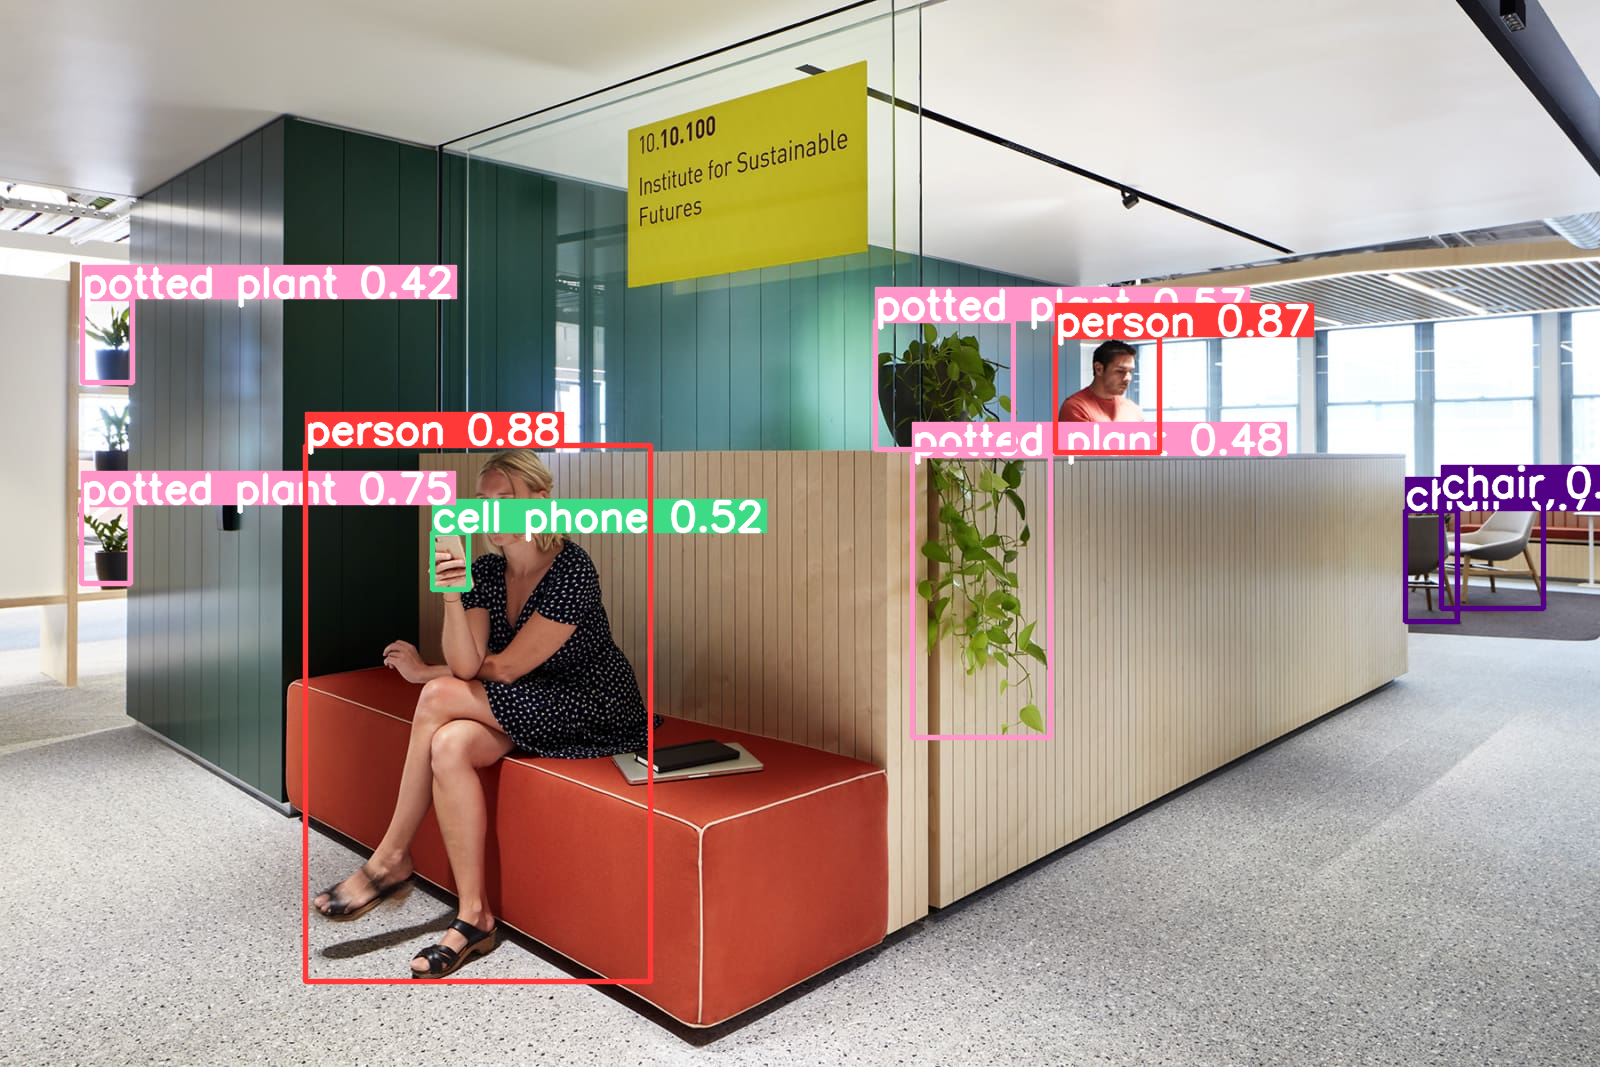

In [46]:
results.show()

In [9]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()    

# Training custom model

In [ ]:
!cd yolov5 & python train.py --img 640 --batch 16 --epochs 200 --data dataset.yaml --weights yolov5s.pt

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/riza_/Desktop/Family/Ahmad/object detection/YoloSewer/yolov5/runs/train/exp4/weights/last.pt')

Using cache found in C:\Users\riza_/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-24 Python-3.8.19 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Loading custom model and making sewer defect detections

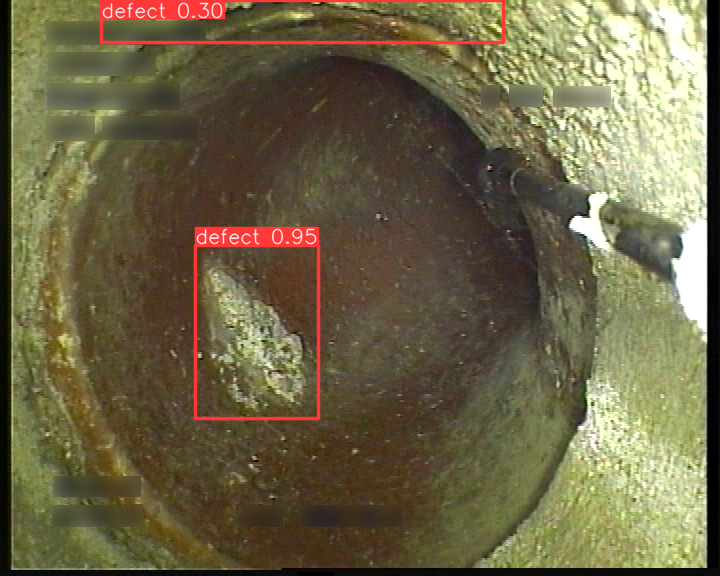

In [38]:
results = model('C:/Users/riza_/Desktop/Family/Ahmad/object detection/YoloSewer/testing_images/22.png')
results.show()